In [2]:
# Import Numpy, TensorFlow, TFLearn, and MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [9]:
#getting mnist data to a zip in the computer.
mnist.SOURCE_URL = 'https://web.archive.org/web/20160117040036/http://yann.lecun.com/exdb/mnist/'
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


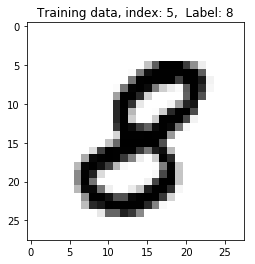

In [53]:
# Function for displaying a training image by it's index in the MNIST set
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(5)

In [36]:
# Define the neural network
def build_model():
    # This resets all parameters and variables
    tf.reset_default_graph()
    
    #### Your code ####
    # Include the input layer, hidden layer(s), and set how you want to train the model
    net = tflearn.input_data([None, 784])
    net = tflearn.fully_connected(net, 100, activation='ReLU')
    #net = tflearn.fully_connected(net, 20, activation='ReLU')
    net = tflearn.fully_connected(net, 10, activation='softmax') 
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.1, loss='categorical_crossentropy')
    # This model assumes that your network is named "net"    
    model = tflearn.DNN(net)
    return model

# Build the model
model = build_model()


In [37]:
# Training
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=8)

Training Step: 3959  | total loss: 0.18649 | time: 2.010s
| SGD | epoch: 008 | loss: 0.18649 - acc: 0.9607 -- iter: 49400/49500
Training Step: 3960  | total loss: 0.17698 | time: 3.030s
| SGD | epoch: 008 | loss: 0.17698 - acc: 0.9627 | val_loss: 0.14868 - val_acc: 0.9578 -- iter: 49500/49500
--


In [59]:
# Compare the labels that our model predicts with the actual labels
predictions = (np.array(model.predict(testX))[:,0] >= 0.5).astype(np.int_)
# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
test_accuracy = np.mean(predictions == testY[:,0], axis=0)
# Print out the result
print("Test accuracy: ", test_accuracy)

pred = model.predict([trainX[5]])
print(np.argmax(pred))

Test accuracy:  0.9958
8
